# WITH STITCHING UNIT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("manufacturing_data.csv")

In [5]:
df.shape

(1197, 15)

In [6]:
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [7]:
df.isnull().sum()


recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

In [8]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


In [9]:
df.dtypes

recordDate              object
fiscalQuarter           object
productionDept          object
dayOfWeek               object
team                    object
plannedEfficiency      float64
standardMinuteValue    float64
workInProgress         float64
overtimeMinutes          int64
performanceBonus         int64
idleMinutes            float64
idleWorkers              int64
styleChangeCount        object
workerCount            float64
efficiencyScore        float64
dtype: object

# feature selection


In [10]:
df=df.drop(columns=["idleMinutes", "idleWorkers","recordDate"])

#keeping only stitching unit 
df=df[df['productionDept']== 'Stitching Unit']
df.head(10)

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,styleChangeCount,workerCount,efficiencyScore
0,Q4,Stitching Unit,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,Minor Style Revision,42.0,0.268214
1,Q3,Stitching Unit,Monday,Line-F3,0.80,11.41,1028.0,4380,50,No Style Change,31.0,0.800359
5,Q3,Stitching Unit,Monday,Line-F2,0.80,30.10,461.0,0,0,No Style Change,59.0,0.800980
8,Q4,Stitching Unit,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,No Style Change,56.5,0.650417
9,Q1,Stitching Unit,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,No Style Change,52.0,0.750396
10,Q1,Stitching Unit,Monday,Line-P1,0.70,20.55,9792.0,6480,60,No Style Change,54.0,0.700398
12,Q1,Stitching Unit,Sunday,Line-S1,0.80,26.16,1033.0,7080,63,No Style Change,59.0,0.800319
14,Q2,Stitching Unit,Wednesday,Line-C1,0.80,25.90,1150.0,10170,70,No Style Change,56.5,0.900145
16,Q2,Stitching Unit,Thursday,Line-S2,0.80,22.52,1327.0,0,113,No Style Change,57.5,1.000345
17,Q2,Stitching Unit,Saturday,Line-P1,0.60,11.41,1039.0,2280,23,Major Design Shift,55.0,0.600448


/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_3332/4216591628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["efficiencyScore"], order=order, palette='Set2')


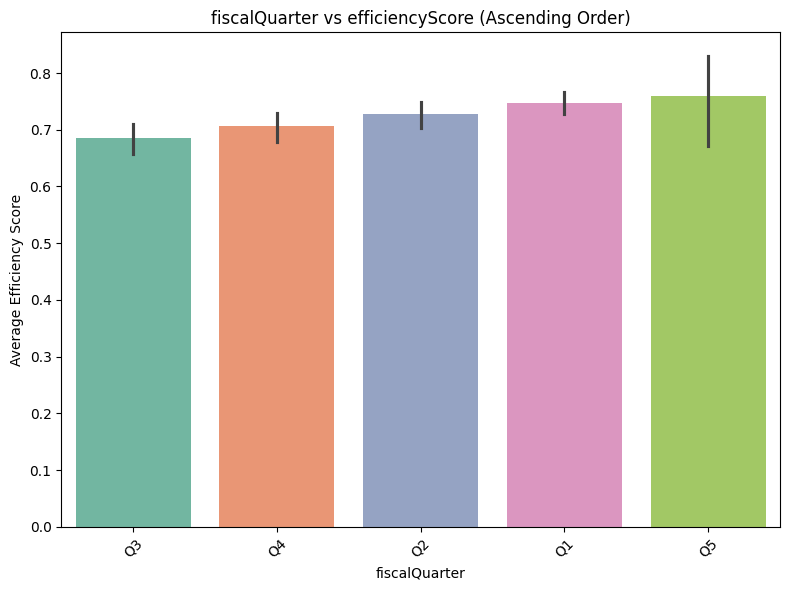

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_3332/4216591628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["efficiencyScore"], order=order, palette='Set2')


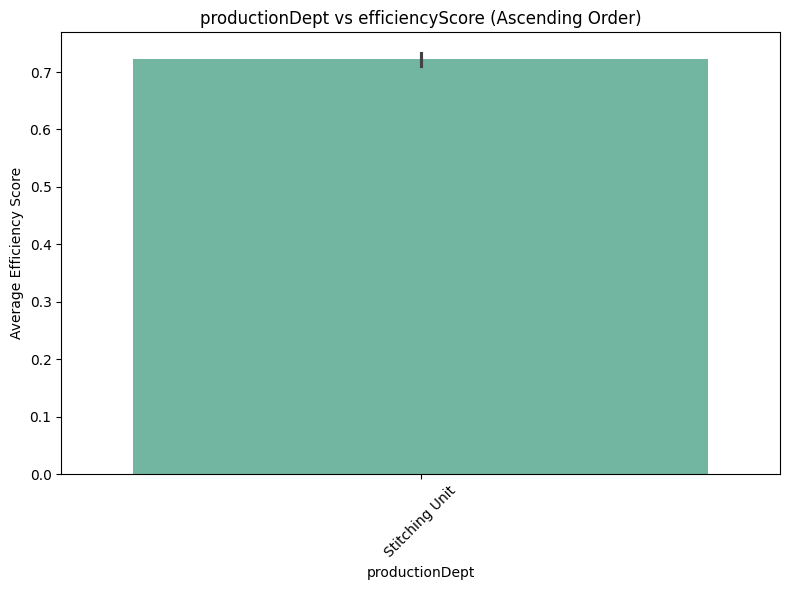

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_3332/4216591628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["efficiencyScore"], order=order, palette='Set2')


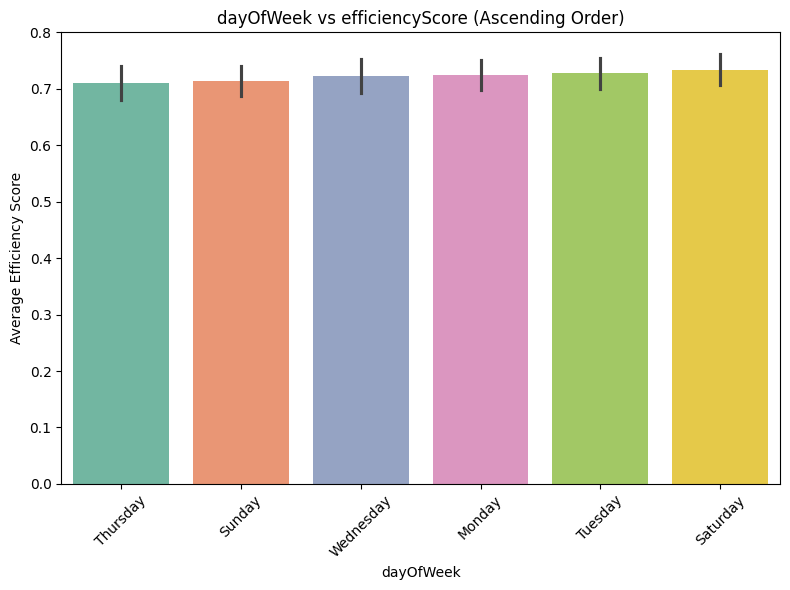

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_3332/4216591628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["efficiencyScore"], order=order, palette='Set2')


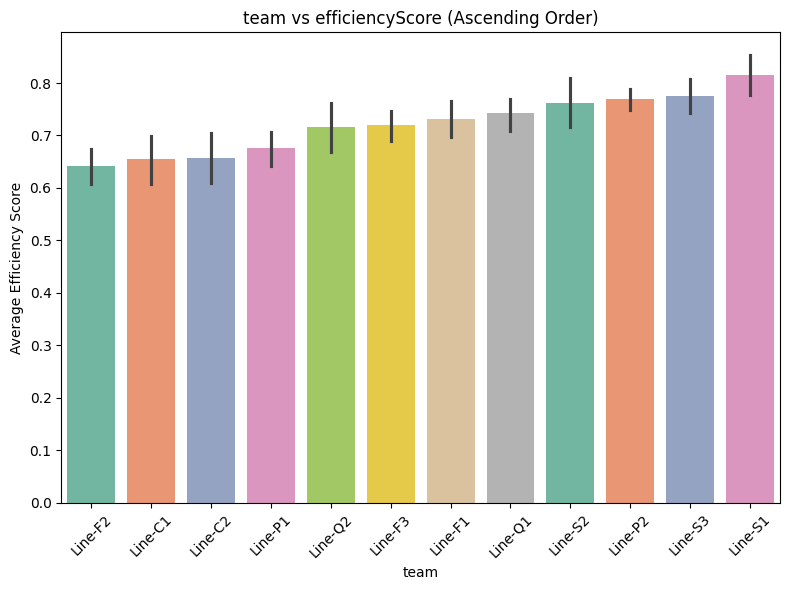

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_3332/4216591628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["efficiencyScore"], order=order, palette='Set2')


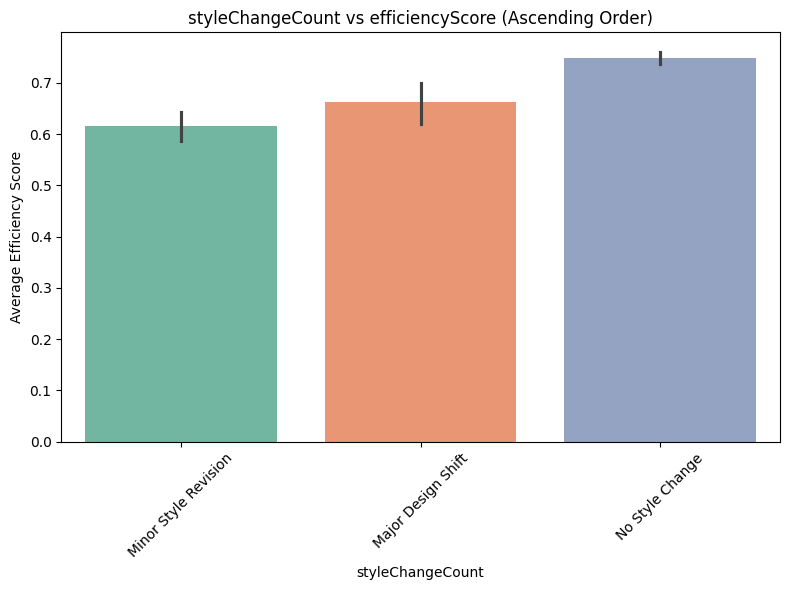

In [11]:
# List of all categorical columns
categorical_cols = ['fiscalQuarter', 'productionDept', 'dayOfWeek', 'team', 'styleChangeCount']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    
    # Sort by mean efficiencyScore for that column
    order = df.groupby(col)['efficiencyScore'].mean().sort_values(ascending=True).index
    
    # Create the barplot with sorted order
    sns.barplot(x=df[col], y=df["efficiencyScore"], order=order, palette='Set2')
    
    plt.title(f'{col} vs efficiencyScore (Ascending Order)')
    plt.xlabel(col)
    plt.ylabel('Average Efficiency Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Encoding


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the updated dataset
df.head()


,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,styleChangeCount,workerCount,efficiencyScore
0,3,0,4,9,0.60,22.53,708.0,5040,0,1,42.0,0.268214
1,2,0,0,4,0.80,11.41,1028.0,4380,50,2,31.0,0.800359
5,2,0,0,3,0.80,30.10,461.0,0,0,2,59.0,0.800980
8,3,0,1,0,0.65,22.52,1295.0,10170,26,2,56.5,0.650417
9,0,0,3,7,0.75,18.79,1228.0,6240,45,2,52.0,0.750396


#  Scaling and Splitting Data

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [14]:
# Separate features and target
X = df.drop(columns=['efficiencyScore'])
y = df['efficiencyScore']
# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
X_train.shape,X_test.shape

((552, 11), (139, 11))

# Train Models


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Linear Regression

In [17]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print("Linear Regression Results:")
print("Train R²:", r2_score(y_train, y_train_pred_lr))
print("Test R²:", r2_score(y_test, y_test_pred_lr))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred_lr))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_lr))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))



Linear Regression Results:
Train R²: 0.7872741031777004
Test R²: 0.7537451772731308
Train MAE: 0.04743751491095641
Test MAE: 0.04602811941618292
Train RMSE: 0.07357882875612616
Test RMSE: 0.06603117821571686


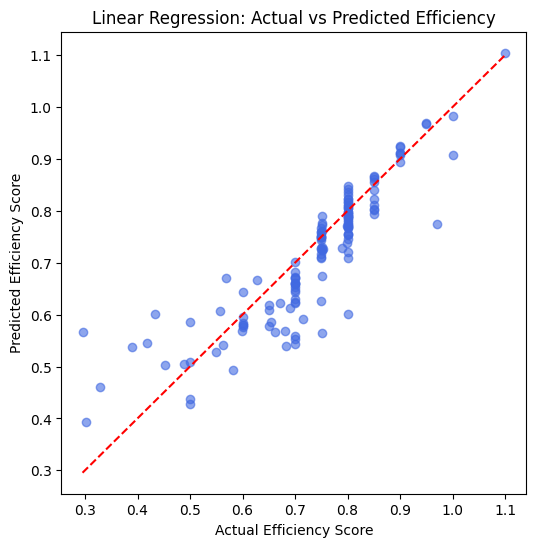

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, color='royalblue')
plt.xlabel("Actual Efficiency Score")
plt.ylabel("Predicted Efficiency Score")
plt.title("Linear Regression: Actual vs Predicted Efficiency")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


 Random Forest


In [19]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Train R²:", r2_score(y_train, y_train_pred_rf))
print("Test R²:", r2_score(y_test, y_test_pred_rf))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_rf))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))



Random Forest Results:
Train R²: 0.974274990050798
Test R²: 0.7696728998406107
Train MAE: 0.01334730470905796
Test MAE: 0.0380553291489928
Train RMSE: 0.025587064530862087
Test RMSE: 0.06386004117263207


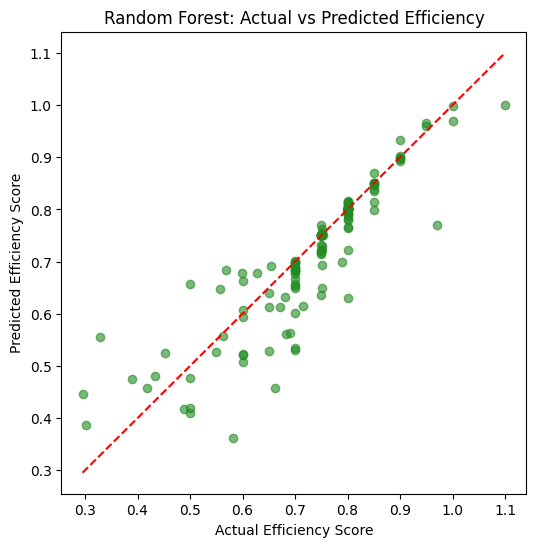

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, color='forestgreen')
plt.xlabel("Actual Efficiency Score")
plt.ylabel("Predicted Efficiency Score")
plt.title("Random Forest: Actual vs Predicted Efficiency")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Gradient Boosting

In [21]:

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Results:")
print("Train R²:", r2_score(y_train, y_train_pred_gb))
print("Test R²:", r2_score(y_test, y_test_pred_gb))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred_gb))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_gb))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_gb)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_gb)))



Gradient Boosting Results:
Train R²: 0.9357688850136101
Test R²: 0.7562301911377631
Train MAE: 0.024998750498385028
Test MAE: 0.040315266246297304
Train RMSE: 0.04043108715018039
Test RMSE: 0.06569716555170642


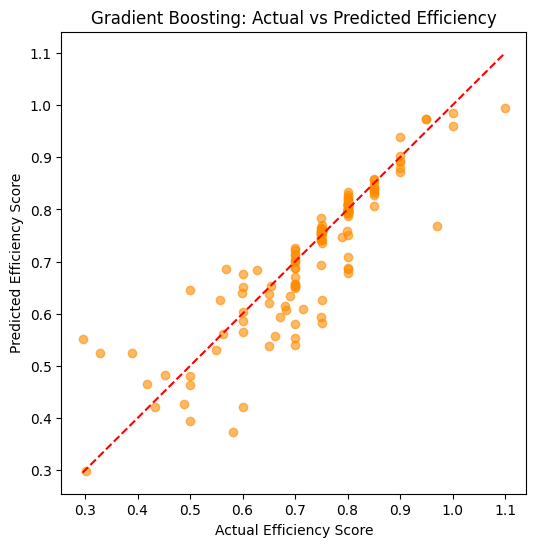

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_gb, alpha=0.6, color='darkorange')
plt.xlabel("Actual Efficiency Score")
plt.ylabel("Predicted Efficiency Score")
plt.title("Gradient Boosting: Actual vs Predicted Efficiency")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# Result comparison


Model Comparison:
               Model  R2 Score
0  Linear Regression  0.753745
1      Random Forest  0.769673
2  Gradient Boosting  0.756230


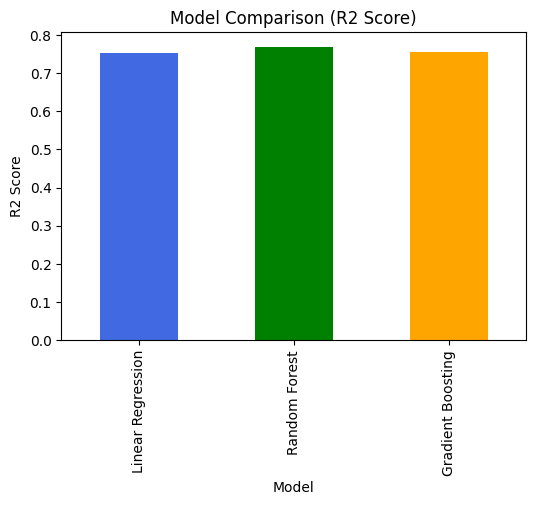

In [26]:

# Store R2 scores for comparison
r2_lr = r2_score(y_test, y_test_pred_lr)
r2_rf = r2_score(y_test, y_test_pred_rf)
r2_gb = r2_score(y_test, y_test_pred_gb)

results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R2 Score": [r2_lr, r2_rf, r2_gb]
})

print("\nModel Comparison:")
print(results_df)

# Plot comparison
results_df.set_index("Model")["R2 Score"].plot(
    kind="bar", color=["royalblue", "green", "orange"], figsize=(6,4), title="Model Comparison (R2 Score)"
)
plt.ylabel("R2 Score")
plt.show()


# SVM

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR


In [32]:
svr = SVR()
svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print("Train R²:", r2_score(y_train, y_train_pred_gb))
print("Test R²:", r2_score(y_test, y_test_pred_gb))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred_gb))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_gb))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_gb)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_gb)))

Train R²: 0.9357688850136101
Test R²: 0.7562301911377631
Train MAE: 0.024998750498385028
Test MAE: 0.040315266246297304
Train RMSE: 0.04043108715018039
Test RMSE: 0.06569716555170642
